# Credit to Dongwoo Kim

https://github.com/arongdari/python-topic-model/




# Exemple of AuthorTopicModel 

"The Author-Topic Model for Authors and Documents" by Rosen-Zvi, et al. (UAI 2004)

In [3]:
import pickle
import logging

import time
import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from ptm import AuthorTopicModel##
from ptm.utils import convert_cnt_to_list, get_top_words##

logger = logging.getLogger('AuthorTopicModel')
logger.propagate=False

%matplotlib inline

ImportError: No module named ptm

## Dataset CORA

Dataset originel disponible à : https://people.cs.umass.edu/~mccallum/data.html

In [2]:
doc_ids = pickle.load(open('/users/usrlocal/artieres/data/cora/doc_ids.pkl', 'rb'))
doc_cnt = pickle.load(open('/users/usrlocal/artieres/data/cora/doc_cnt.pkl', 'rb'))
doc_author = pickle.load(open('/users/usrlocal/artieres/data/cora/doc_authorid.pkl', 'rb'))
author_name = pickle.load(open('/users/usrlocal/artieres/data/cora/authorid_authorname.pkl', 'rb'))
voca = pickle.load(open('/users/usrlocal/artieres/data/cora/voca.pkl', 'rb'))



### Contenu des structures de données
- voca : 
C'est une liste des mots du vocabulaire de l'ensemble des documents. Les autres structures de données font référence aux indices des ots dans cette liste. 
- author_name : 
C'est une liste des auteurs de l'ensemble des documents. Les autres structures de données font référence aux indices des auteurs dans cette liste. 
- doc_author : 
C'est une liste de listes (une par document). La liste d'un document contient les indices des auteurs du document 
- doc_ids : 
C'est une liste de listes (une par document). La liste d'un document contient les indices des mots apparaissant dans le document 
- doc_cnt :
C'est une liste de listes (une par document). La liste d'un document contient le nombre de fois qu'apparait chaque mot du document tel que spédicifié dans la liste correspondante dans doc_ids 


In [3]:
print len(doc_ids)
print len(doc_cnt)
print len(doc_author)
print len(author_name)
print len(voca)
print len(doc_ids[1])
print doc_ids[1]
print doc_cnt[1]
print doc_author[1]
print voca[1]
print author_name[1]


13147
13147
13147
24486
17059
88
[13910, 4518, 10249, 16914, 4627, 15383, 15903, 8736, 10786, 14970, 551, 7720, 2613, 1033, 15419, 5692, 3645, 10816, 14913, 10819, 16452, 12872, 14412, 16982, 2135, 5307, 13414, 9845, 17014, 5753, 7290, 4226, 7815, 7826, 10388, 13978, 11419, 9887, 8870, 1710, 2226, 6329, 2235, 10432, 14542, 6362, 16091, 16092, 6778, 9467, 5379, 9990, 3335, 16137, 7441, 3352, 16666, 15132, 7453, 11553, 14630, 647, 2348, 15166, 15684, 8518, 14667, 11622, 3434, 1389, 16756, 13689, 2440, 13713, 12189, 9638, 13234, 6072, 7839, 15811, 7625, 13771, 2519, 4058, 10715, 4579, 4069, 7167]
[1, 1, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 4, 1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 9, 1]
[1174, 18535, 9596]
homomorphism
R Bello


In [4]:
corpus = convert_cnt_to_list(doc_ids, doc_cnt)
n_doc = len(corpus)
n_author = len(author_name)
n_voca = len(voca)

print n_doc
print n_author
print n_voca

13147
24486
17059


La fonction convert_cnt_to_list crée une structure de type liste de listes (une par document). La  liste d'un document contient l'ensemble des mots (des indices de mots) du document, éventuellement avec répétitions. 

In [5]:
print corpus[1]
print np.sum(doc_cnt[1])

[13910, 4518, 10249, 16914, 4627, 4627, 15383, 15903, 8736, 10786, 14970, 14970, 14970, 14970, 14970, 14970, 14970, 551, 7720, 2613, 1033, 15419, 5692, 5692, 5692, 5692, 3645, 10816, 14913, 14913, 14913, 10819, 16452, 12872, 12872, 12872, 14412, 14412, 14412, 16982, 2135, 5307, 5307, 13414, 9845, 17014, 5753, 7290, 4226, 4226, 4226, 7815, 7826, 7826, 10388, 10388, 10388, 13978, 11419, 11419, 9887, 8870, 8870, 8870, 8870, 1710, 2226, 2226, 2226, 6329, 2235, 2235, 10432, 14542, 6362, 6362, 6362, 16091, 16092, 6778, 6778, 9467, 9467, 5379, 9990, 3335, 16137, 7441, 3352, 16666, 15132, 7453, 11553, 14630, 14630, 647, 647, 2348, 2348, 15166, 15684, 15684, 15684, 8518, 14667, 14667, 14667, 14667, 14667, 14667, 14667, 14667, 14667, 11622, 3434, 1389, 16756, 13689, 2440, 13713, 12189, 12189, 12189, 9638, 13234, 6072, 7839, 15811, 7625, 13771, 2519, 2519, 2519, 4058, 10715, 10715, 4579, 4069, 4069, 4069, 4069, 4069, 4069, 4069, 4069, 4069, 7167]
147


## K-means et tf-idf

- creer une fonction qui transforme ces représenations sous la forme TF-IDF (term frequency–inverse document frequency)
- coder la fonction Kmeans qui prend en entrée des descripteurs tf-idf de documents et fait le clustering


def tf_idf_transform(X):

"""
    Code tf-idf transform from a set of sample X
    
    Step 1 - Compute idf for each word of the vocabulary over the entire set.
    Step 2 - Compute tf for each sample
    Step 3 - Compute tf times idf to build transformed sample descriptors
"""



def k_means(X, n_clusters, max_iter=300):

"""
    Code K-means clustering using tf-idf descriptors.
    
    Step 1 - Pick K random points as cluster centers called centroids.
    Step 2 - Assign each Xi to nearest cluster by calculating its distance to each centroid (distance will be computed by l2-normalizing descriptors followed by dot product to obtain cosine similarity).
    Step 3 - Find new cluster center by taking the average of the assigned points.
    Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.
"""


# Analyse des resultats

Pour 10 clusters: 
  - afficher les mots les plus fréquents et discriminants (maximums des descripteurs)
  - afficher la population de chaque cluster
  - calculer une matrice de similarité entre les différents clusters


## K-means et bag-of-words

- créer une représentation bag-of-words à partir des descripteurs initiaux
- utiliser sklearn.cluster.KMeans pour faire le k-means
- observer les résultats: mots les plus fréquents dans les clusters

- refaire les clustering après normalisation l2 des descripteurs
- observer encore les résultats

## LDA

In [6]:
from ptm import GibbsLDA

max_iter=4
n_topic=10

modelLDA = GibbsLDA(n_doc, len(voca), n_topic)
modelLDA.fit(corpus, max_iter=max_iter)

2017-11-27 11:58:46 INFO:GibbsLDA:[ITER] 0,	elapsed time:7.46,	log_likelihood:-10865429.01
2017-11-27 11:58:53 INFO:GibbsLDA:[ITER] 1,	elapsed time:7.41,	log_likelihood:-10535941.69
2017-11-27 11:59:01 INFO:GibbsLDA:[ITER] 2,	elapsed time:7.37,	log_likelihood:-10285990.72


### Les 10 mots les plus probables pour chaque topic

In [7]:
for ti in range(n_topic):
    top_words = get_top_words(modelLDA.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

('Topic', 0, ': ', u'system,algorithm,problem,paper,model,method,data,application,network,present')
('Topic', 1, ': ', u'system,algorithm,paper,network,problem,data,application,model,method,result')
('Topic', 2, ': ', u'system,algorithm,paper,application,model,problem,data,network,approach,technique')
('Topic', 3, ': ', u'system,algorithm,paper,problem,model,performance,approach,present,application,data')
('Topic', 4, ': ', u'system,algorithm,problem,paper,model,network,data,application,performance,present')
('Topic', 5, ': ', u'system,algorithm,problem,paper,model,data,using,time,method,result')
('Topic', 6, ': ', u'system,algorithm,paper,problem,model,data,application,method,present,result')
('Topic', 7, ': ', u'system,algorithm,paper,model,data,problem,performance,approach,network,technique')
('Topic', 8, ': ', u'system,model,performance,algorithm,problem,data,network,paper,using,result')
('Topic', 9, ': ', u'system,algorithm,paper,network,model,problem,application,data,performance,

##  Modèle author-topic

In [8]:
max_iter=1
n_topic=10

modelAT = AuthorTopicModel(n_doc, n_voca, n_topic, n_author)

modelAT.fit(corpus, doc_author, max_iter=max_iter)

2017-11-27 12:00:05 INFO:AuthorTopicModel:[INIT] 0	elapsed_time:22.93	log_likelihood:-10865031.28


## Les 10 mots les plus probables pour chaque topic

In [9]:
for k in range(n_topic):
    top_words = get_top_words(modelAT.TW, voca, k, 10)
    print('topic ', k , ','.join(top_words))

('topic ', 0, u'system,algorithm,paper,model,problem,application,network,performance,data,method')
('topic ', 1, u'system,algorithm,problem,paper,model,data,application,network,method,performance')
('topic ', 2, u'system,algorithm,paper,problem,model,performance,data,application,using,network')
('topic ', 3, u'system,algorithm,paper,model,problem,data,application,network,method,approach')
('topic ', 4, u'system,algorithm,paper,problem,model,data,network,result,using,performance')
('topic ', 5, u'system,algorithm,paper,model,problem,data,network,application,present,using')
('topic ', 6, u'system,algorithm,problem,paper,model,network,data,performance,using,application')
('topic ', 7, u'system,algorithm,paper,problem,model,data,application,method,using,network')
('topic ', 8, u'system,algorithm,model,paper,problem,data,network,performance,method,application')
('topic ', 9, u'system,algorithm,problem,paper,model,data,network,performance,method,result')


## Distribution sur les topics pour un auteur particulier

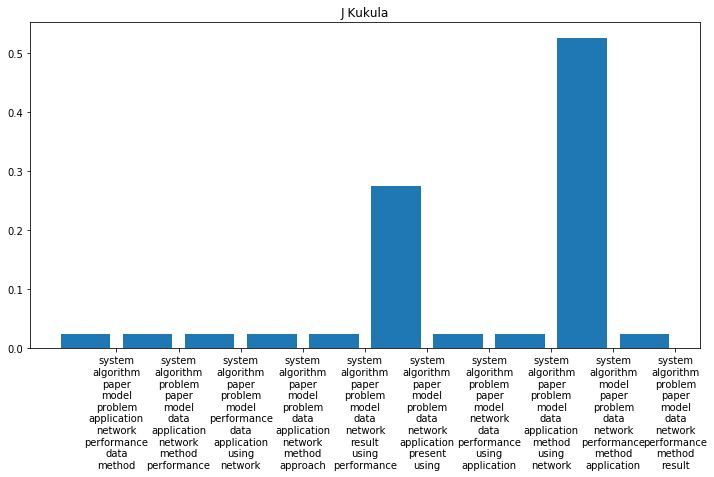

In [11]:
author_id = 7
fig = plt.figure(figsize=(12,6))
plt.bar(range(n_topic), modelAT.AT[author_id]/np.sum(modelAT.AT[author_id]))
plt.title(author_name[author_id])
plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(modelAT.TW, voca, k, 10)) for k in range(n_topic)])
plt.show()
modelAT

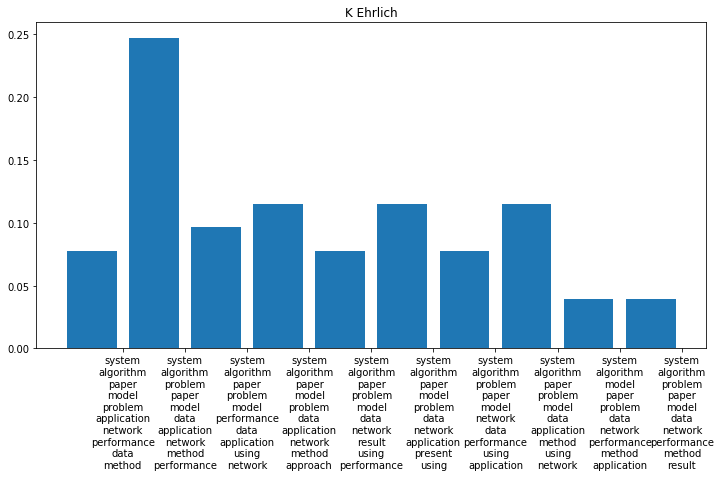

In [12]:
author_id = 32
fig = plt.figure(figsize=(12,6))
plt.bar(range(n_topic), modelAT.AT[author_id]/np.sum(modelAT.AT[author_id]))
plt.title(author_name[author_id])
plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(modelAT.TW, voca, k, 10)) for k in range(n_topic)])
plt.show()

# Travail à faire

    1. Caractériser les solutions trouvées par les méthodes proposées :
    - Définir une mesure de similarité entre topics. 
    - Calculer le degré de similarité minimmum, maximum et moyen entre deux topics en fonction du nombre d'itérations d'apprentissage de LDA et de AuthorTopic.